In [5]:
import pandas as pd
import numpy as np

np.random.seed(42)
num_rows = 6000
pressure_columns = ['pressure' + str(i) for i in range(1, 101)]
pressure_values = np.random.randint(0, 4096, size=(num_rows, 100))
df = pd.DataFrame(pressure_values, columns=pressure_columns)
df['total_pressure'] = df.sum(axis=1)
df['sleep'] = np.where(df.index < num_rows // 2, 0, 1)
print(df.head())
df.to_csv('dummy_dataset.csv', index=False)

   pressure1  pressure2  pressure3  pressure4  pressure5  pressure6  \
0       3174       3507        860       1294       1130       1095   
1        702       2449       2777       1579        161        201   
2       3646        863       2790       3312        563       1020   
3       3296       2432       3474       1661       1153       1076   
4       3991        627        586       1648       4039       1443   

   pressure7  pressure8  pressure9  pressure10  ...  pressure93  pressure94  \
0       3772       3092       1638        2169  ...        3073        1021   
1       1981        995       2317        3934  ...         392         206   
2         95       1923       1757        2532  ...        2160           1   
3       1707       2777       1695        1733  ...        2863        2255   
4       1445        103       3923         253  ...        2544         301   

   pressure95  pressure96  pressure97  pressure98  pressure99  pressure100  \
0        3461       

[1.0, 0.7397916666666666, 0.7489583333333333, 0.6958333333333333, 0.6641666666666667, 0.6360416666666666, 0.6170833333333333, 0.59, 0.5766666666666667, 0.5695833333333333, 0.5608333333333333, 0.556875, 0.5604166666666667, 0.5602083333333333]
[0.4875, 0.5075, 0.5191666666666667, 0.5241666666666667, 0.5141666666666667, 0.5125, 0.5225, 0.5183333333333333, 0.515, 0.5125, 0.5008333333333334, 0.5158333333333334, 0.5058333333333334, 0.52]


Text(0, 0.5, 'Accuracy')

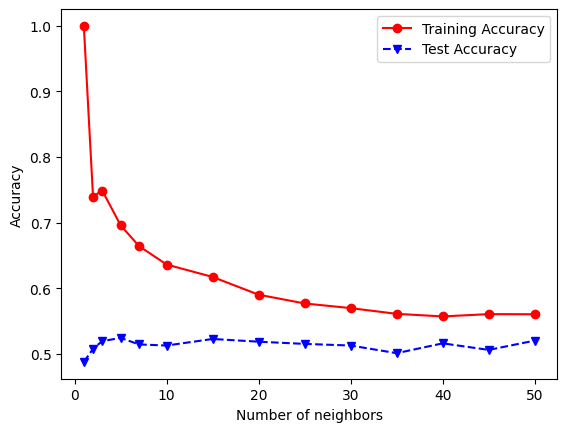

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('dummy_dataset.csv')

X = df.drop(['sleep', 'total_pressure'], axis=1)
y = df['sleep']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numNeighbors = [1,2,3,5,7,10,15,20,25,30,35,40,45,50]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k)
    clf1.fit(X_train, y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

print(trainAcc)
print(testAcc)
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

[0.5247916666666667, 0.5247916666666667, 0.5347916666666667, 0.571875, 0.625625, 0.743125, 0.9047916666666667, 0.98125, 0.9991666666666666, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.495, 0.495, 0.5041666666666667, 0.49, 0.4925, 0.5, 0.49, 0.4925, 0.47833333333333333, 0.4791666666666667, 0.4891666666666667, 0.48333333333333334, 0.48333333333333334, 0.49166666666666664]


Text(0, 0.5, 'Accuracy')

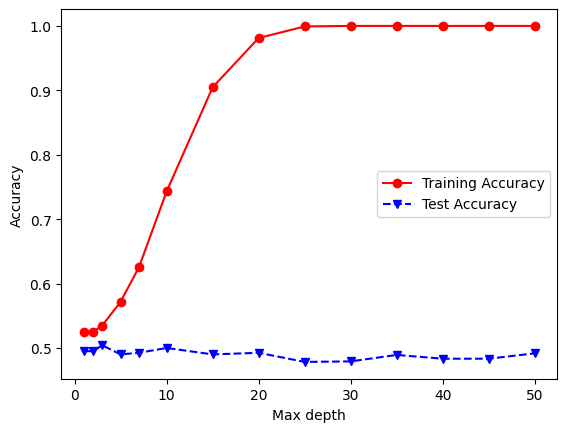

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('dummy_dataset.csv')

X = df.drop(['sleep', 'total_pressure'], axis=1)
y = df['sleep']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depths = [1,2,3,5,7,10,15,20,25,30,35,40,45,50]
trainAcc = []
testAcc = []

for k in max_depths:
    clf1 = DecisionTreeClassifier(max_depth=k)
    clf1.fit(X_train, y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

print(trainAcc)
print(testAcc)
plt.plot(max_depths, trainAcc, 'ro-', max_depths, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [13]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import joblib
df = pd.read_csv('dummy_dataset.csv')
X = df.drop(['sleep', 'total_pressure'], axis=1)
y = df['sleep']
clf = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)
clf.fit(X, y)
joblib.dump(clf, 'model.pkl')



['model.pkl']

In [15]:
import pandas as pd
import numpy as np
import joblib
num_points = 3
dummy_data = {}
for i in range(1, 101):
    col_name = f'pressure{i}'
    dummy_data[col_name] = np.random.randint(0, 4096, size=num_points)
df_dummy = pd.DataFrame(dummy_data)
print("Inputted data with 100 pressure columns:")
print(df_dummy)
print(type(df_dummy))
clf_loaded = joblib.load('model.pkl')
predictions = clf_loaded.predict(df_dummy)
print("\nPredictions for the dummy data:")
for i, pred in enumerate(predictions):
    if pred == 1:
        status = "Awake"
    else:
        status = "Asleep"
    print(f"Data Point {i+1}: Predicted Sleep Status = {status}")

Inputted data with 100 pressure columns:
   pressure1  pressure2  pressure3  pressure4  pressure5  pressure6  \
0       2348       1806       2257       2058         51       4028   
1        198       3933       1347       1177       2045       3045   
2       3106       1851       3576       3252       2460         49   

   pressure7  pressure8  pressure9  pressure10  ...  pressure91  pressure92  \
0       1722       3822       2209         931  ...        2443        3373   
1       3129        182       2916        1051  ...        1404        1268   
2       1827       3076        580        1875  ...         763         361   

   pressure93  pressure94  pressure95  pressure96  pressure97  pressure98  \
0        3799        2873        3593        2044         184        2077   
1        2192          30        2691         778        2120        3786   
2         516        1844         771        2249        2422        3039   

   pressure99  pressure100  
0        1446      